# 1 ) Inspection des données et nettoyage

### 1-1 ) Importation des données bruts

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/creditcard.csv')


### 1-2 ) Observation des stats de base, détection des outlayer/valeur NULL/doublons

In [8]:
print("RESUMER DU DATAFRAME")
print("=="*50)
print(df.info())
print("=="*50)
print("VALEURS MANQUANTES PAR COLONNE") 
print("=="*50)  
print(df.isnull().sum())
print("=="*50)  
print("STATISTIQUES DESCRIPTIVES")  
print("=="*50)  
print(df.describe())    
print("=="*50)  
print("DOUBLONS")
print("=="*50)
print(f"Nombre de doublons: {df.duplicated().sum()}")    

RESUMER DU DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

## Nettoyage des données

In [10]:
# Gestion des valeurs manquantes
df_clean = df.copy()
df_clean.dropna()
df_clean.fillna(df.mean(), inplace=True)

# Standardisation des données

scaler = StandardScaler()
df_clean[['Amount']] = scaler.fit_transform(df_clean[['Amount']])

# Vérification cohérence des données
assert df['Class'].isin([0, 1]).all() #Classe binaire
assert (df['Amount'] >= 0).all() #Montant positif

# Gestion des doublons
df_clean.drop_duplicates(inplace=True)

#Export des données nettoyées
df_clean.to_csv('../data/creditcard_clean.csv', index=False)

## Analyses univariées

In [ ]:
df_clean = pd.read_csv('../data/creditcard_clean.csv')


Heures avec le PLUS de fraudes:
           Fraudes  Total    Taux  Taux_%
Time_hour                                
2               57   3328  0.0171    1.71
4               23   2209  0.0104    1.04
3               17   3492  0.0049    0.49
5               11   2990  0.0037    0.37
7               23   7243  0.0032    0.32

Heures avec le MOINS de fraudes:
           Fraudes  Total    Taux  Taux_%
Time_hour                                
10               8  16598  0.0005    0.05
22               9  15441  0.0006    0.06
0                6   7695  0.0008    0.08
8                9  10276  0.0009    0.09
21              16  17703  0.0009    0.09


Text(0.5, 0.98, '')

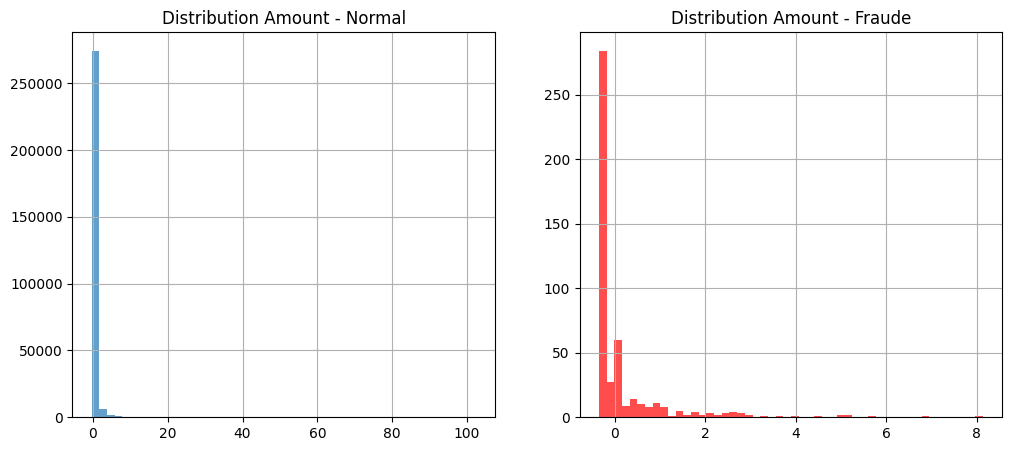

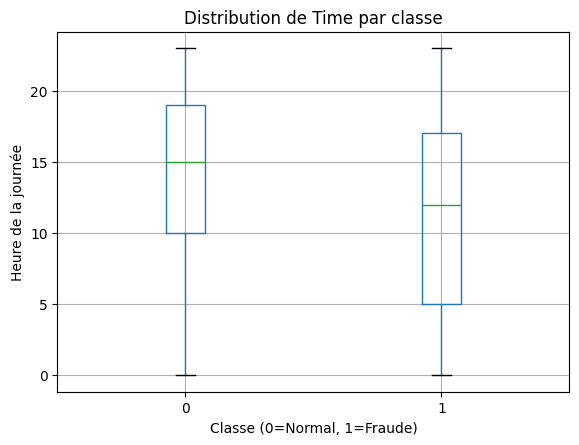

In [ ]:
# Résumé des statistiques par classe
statistiques_par_classe = df_clean.groupby('Class').agg(['mean', 'median', 'std'])
print(statistiques_par_classe)

# Distribution avec histogrammes séparés
df_clean.groupby('Class')['Amount'].describe()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_clean[df_clean.Class == 0]['Amount'].hist(bins=50, alpha=0.7)
plt.title('Distribution Amount - Normal')
plt.subplot(1, 2, 2)
df_clean[df_clean.Class == 1]['Amount'].hist(bins=50, alpha=0.7, color='red')
plt.title('Distribution Amount - Fraude')
plt.savefig('../outputs/distribution_amount.png', dpi=100, bbox_inches='tight')

# Analyses de la variable 'Time'
df['Time_hour_all'] = (df['Time'] / 3600) % 24
df['Time_hour'] = np.floor(df['Time_hour_all']).astype(int)
    
# Taux de fraude par heure
fraud_by_hour = df.groupby('Time_hour').agg({
    'Class': ['sum', 'count', 'mean']
}).round(4)
fraud_by_hour.columns = ['Fraudes', 'Total', 'Taux']
fraud_by_hour['Taux_%'] = fraud_by_hour['Taux'] * 100
    
print("\nHeures avec le PLUS de fraudes:")
print(fraud_by_hour.sort_values('Taux', ascending=False).head(5))
    
print("\nHeures avec le MOINS de fraudes:")
print(fraud_by_hour.sort_values('Taux', ascending=True).head(5))

df.boxplot(column='Time_hour', by='Class')
plt.xlabel('Classe (0=Normal, 1=Fraude)')
plt.ylabel('Heure de la journée')
plt.title('Distribution de Time par classe')
plt.suptitle('')

## Analyse multivariées

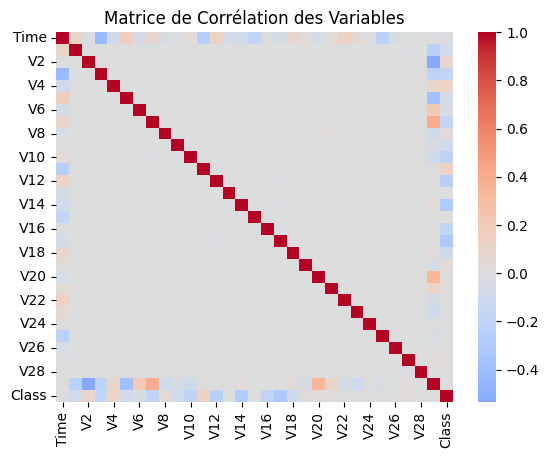

In [24]:
# Analyse de la corrélation entre les variables
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation des Variables')
plt.savefig('../outputs/matrice_correlation.png', dpi=100, bbox_inches='tight')


Nombre de transactions par classe:
Class
0    284315
1       492
Name: count, dtype: int64

Proportion de transactions par classe (%):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Ratio Classe 0 / Classe 1: 577.88


C:\Users\richa\AppData\Local\Temp\ipykernel_10740\512360276.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


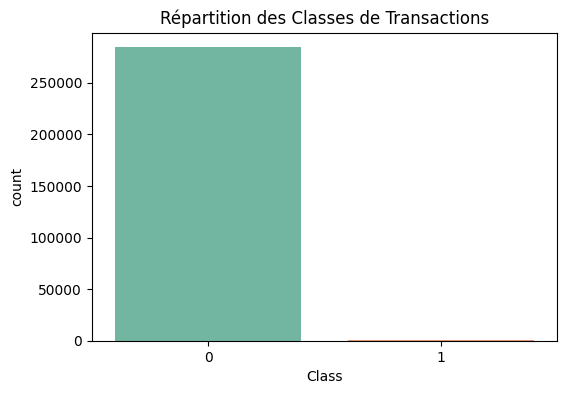

In [28]:
# Répartition des classes
class_counts = df['Class'].value_counts().sort_index()
class_proportions = df['Class'].value_counts(normalize=True).sort_index() * 100
ratio = class_counts[0] / class_counts[1]

print("\nNombre de transactions par classe:")
print(class_counts)
print("\nProportion de transactions par classe (%):")
print(class_proportions)
print(f"\nRatio Classe 0 / Classe 1: {ratio:.2f}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Répartition des Classes de Transactions')
plt.savefig('../outputs/repartition_classes.png', dpi=100, bbox_inches='tight')


In [34]:
class_counts = df['Class'].value_counts().sort_index()
class_pct = (class_counts / class_counts.sum() * 100).round(4)

fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=('Distribution des Classes', 
                       'Proportion (%)', 
                       'Ratio de Déséquilibre'),
        specs=[[{'type': 'bar'}, {'type': 'pie'}, {'type': 'bar'}]]
    )
    
    # 1. Bar chart avec comptages
fig.add_trace(
    go.Bar(
        x=class_counts.index,
        y=class_counts.values,
        text=[f'{v:,}<br>({class_pct[k]:.4f}%)' for k, v in class_counts.items()],
        textposition='auto',
        marker_color=['#2ecc71', '#e74c3c'],
        name='Comptage',
        hovertemplate='<b>%{x}</b><br>Transactions: %{y:,}<extra></extra>'
    ),
    row=1, col=1
)
    
    # 2. Pie chart
fig.add_trace(
    go.Pie(
        labels=class_counts.index,
        values=class_counts.values,
        marker_colors=['#2ecc71', '#e74c3c'],
        hole=0.4,
        textinfo='label+percent',
        hovertemplate='<b>%{label}</b><br>Transactions: %{value:,}<br>Pourcentage: %{percent}<extra></extra>'
    ),
    row=1, col=2
)
    
    # 3. Ratio visualization
ratio = class_counts[0] / class_counts[1]
fig.add_trace(
    go.Bar(
        x=['Fraude', 'Normal'],
        y=[1, ratio],
        text=[f'1', f'{ratio:.0f}'],
        textposition='auto',
        marker_color=['#e74c3c', '#2ecc71'],
        name='Ratio',
        hovertemplate='<b>%{x}</b><br>Ratio: %{y:.2f}<extra></extra>'
    ),
    row=1, col=3
)
    
fig.update_xaxes(title_text="Classe", row=1, col=1)
fig.update_yaxes(title_text="Nombre de transactions", row=1, col=1)
fig.update_yaxes(title_text="Ratio relatif", type="log", row=1, col=3)
    
fig.update_layout(
    title_text=f"<b>Analyse du Déséquilibre des Classes</b><br><sub>Ratio: {ratio:.0f}:1</sub>",
    height=400,
    showlegend=False,
    template='plotly_white'
)